## Problem Statement 5: Live Coding Session - API Integration
Problem: Develop a Python script to integrate with an external API and fetch data based on user input. Requirements:
* Use the Requests library to make API calls.
* Handle API responses and errors gracefully.
* Parse and display the fetched data in a user-friendly format. Evaluation Criteria:
* Correct implementation of API integration.
* Handling of different types of API responses and errors.
* Clean and well-structured code with appropriate comments.


Steps to Approach the Assessment

* Setup:
Install the Requests library if you haven’t already (pip install requests).

* Make API Calls:
Use requests.get() to make a GET request to the API endpoint.
Pass any necessary parameters or headers required by the API.

* Error Handling:
Check the response status code (e.g., response.status_code).
Handle different types of errors gracefully (e.g., invalid input, connection issues).

* Parse and Display Data:
Convert the response data (usually JSON) to a Python dictionary using response.json().
Extract and format the relevant information for display.

In [12]:
pip install requests

## 1. Whether API **Integration**

In [14]:
import requests
import json

def fetch_weather(api_key, city):
    """
    Fetches current weather data from OpenWeatherMap API and displays it in a JSON format with indentation.

    Parameters:
    - api_key: Your OpenWeatherMap API key
    - city: The city for which to fetch weather data
    """
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric'  # or 'imperial' for Fahrenheit
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()

        # Pretty print the JSON data with indentation
        formatted_data = json.dumps(data, indent=4)
        print("Weather Data (Formatted JSON):")
        print(formatted_data)

    except requests.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except Exception as err:
        print(f"An error occurred: {err}")

if __name__ == "__main__":
    api_key = "0f896ae80d9754975578b235eca65ec2"
    city = "India"

    fetch_weather(api_key, city)


Weather Data (Formatted JSON):
{
    "coord": {
        "lon": 12.2797,
        "lat": 46.7406
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 8,
        "feels_like": 8,
        "temp_min": 8,
        "temp_max": 8,
        "pressure": 1015,
        "humidity": 100,
        "sea_level": 1015,
        "grnd_level": 817
    },
    "visibility": 10000,
    "wind": {
        "speed": 0.51,
        "deg": 0
    },
    "clouds": {
        "all": 73
    },
    "dt": 1725510955,
    "sys": {
        "type": 1,
        "id": 6809,
        "country": "IT",
        "sunrise": 1725510975,
        "sunset": 1725558189
    },
    "timezone": 7200,
    "id": 3168508,
    "name": "Innichen",
    "cod": 200
}


## Key Concepts and Functions:
### requests.get():

Sends an HTTP GET request to the OpenWeatherMap API.
It fetches the current weather data for the given city.
### response.raise_for_status():

This function checks if the request was successful. If the server returns an error (e.g., 404, 500), it will raise an HTTPError.
This is important for catching any issues with the API call, such as invalid parameters or network issues.
### response.json():

Converts the API response, which is in JSON format, into a Python dictionary. This allows us to easily work with and manipulate the data in Python.
### json.dumps(data, indent=4):

Converts the Python dictionary (the parsed JSON) back into a JSON-formatted string, but with indentation.
indent=4: Adds 4 spaces for indentation, making the JSON more readable and user-friendly.
This makes the raw JSON response easier to read, especially for humans, by properly formatting nested structures.
## Error Handling:
try and except blocks:
The code is wrapped in a try block to catch potential exceptions.
requests.HTTPError handles any HTTP errors (e.g., if the API returns a 404 or 403 status code).
The generic Exception catches any other types of errors (e.g., network issues or invalid API key).
## Output:
The code prints the fetched weather data in a neatly formatted JSON string.
This makes the data more readable compared to printing it in a raw, unformatted manner.
## Why this is useful:
API responses often contain a lot of nested information, such as the structure for weather conditions, temperature, wind speed, etc.
By formatting the JSON output, you can clearly see the different sections and values in the response, making it easier to parse and understand the data for further use.








---



# 2. NASA's Astronomy Picture of the Day (APOD) API

## Overview:
Provides the Astronomy Picture of the Day and its details.

In [15]:
import requests

def fetch_apod(api_key):
    """
    Fetches Astronomy Picture of the Day from NASA's API and displays it.

    Parameters:
    - api_key: NASA API key
    """
    url = "https://api.nasa.gov/planetary/apod"
    params = {
        'api_key': api_key
    }

    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        print("Astronomy Picture of the Day:")
        print("Title:", data['title'])
        print("Description:", data['explanation'])
        print("URL:", data['url'])

    except requests.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except Exception as err:
        print(f"An error occurred: {err}")

if __name__ == "__main__":
    api_key = "drzb9pjKoRuG5XeQ96aqdOKGL4zJ6cSMr0Xa0csP"
    fetch_apod(api_key)

Astronomy Picture of the Day:
Title: NGC 247 and Friends
Description: About 70,000 light-years across, NGC 247 is a spiral galaxy smaller than our Milky Way. Measured to be only 11 million light-years distant it is nearby though. Tilted nearly edge-on as seen from our perspective, it dominates this telescopic field of view toward the southern constellation Cetus. The pronounced void on one side of the galaxy's disk recalls for some its popular name, the Needle's Eye galaxy. Many background galaxies are visible in this sharp galaxy portrait, including the remarkable string of four galaxies just below and left of NGC 247 known as Burbidge's Chain. Burbidge's Chain galaxies are about 300 million light-years distant. NGC 247 itself is part of the Sculptor Group of galaxies along with shiny spiral NGC 253.
URL: https://apod.nasa.gov/apod/image/2409/NGC247-Hag-Ben1024.JPG


![image.png](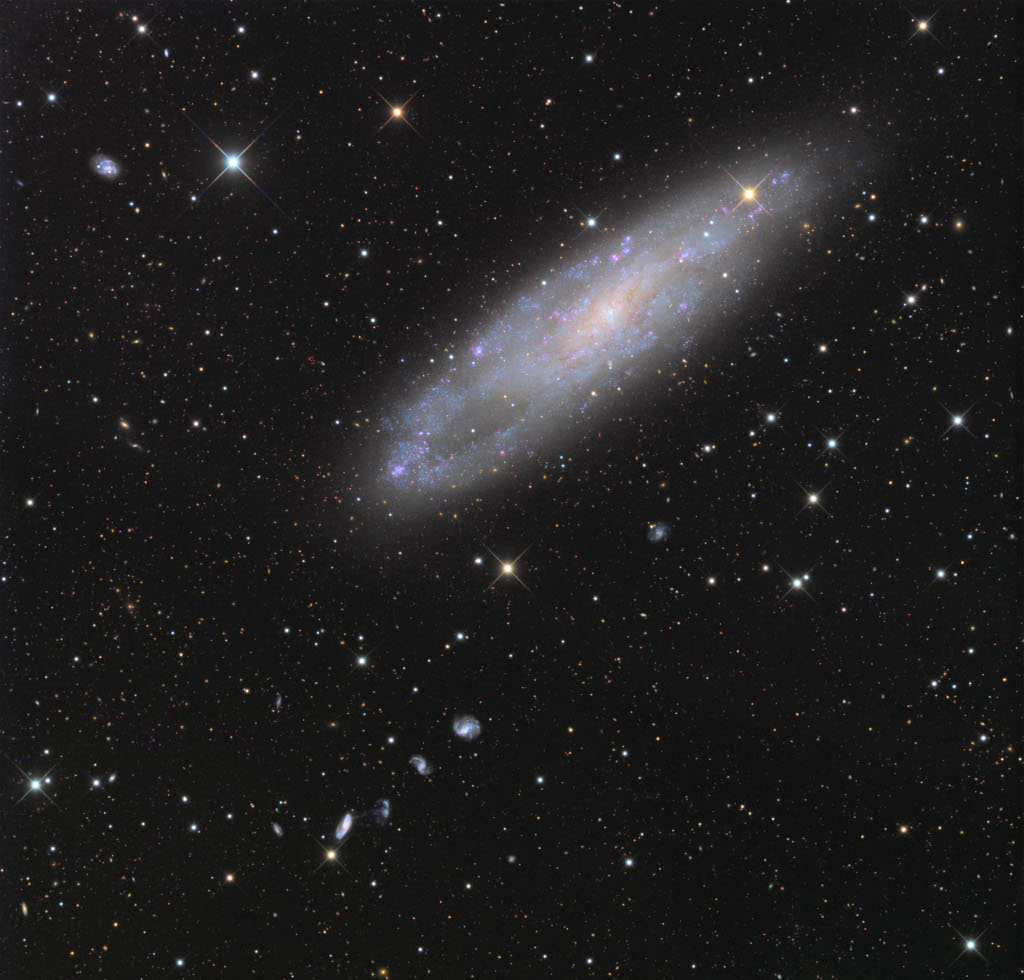![image.png](data:image/png;base64,))

In [18]:
url = "https://api.nasa.gov/planetary/apod"
params = {
        'api_key': api_key}
response = requests.get(url, params=params)
response.raise_for_status()  # Raises an HTTPError if the HTTP request returned an unsuccessful status code
data = response.json()  # Converts the response to JSON format


In [20]:
# Format the JSON data
formatted_data = json.dumps(data, indent=4)
print("Astronomy Picture of the Day (Formatted JSON):")
print(formatted_data)

Astronomy Picture of the Day (Formatted JSON):
{
    "copyright": "Eric Benson",
    "date": "2024-09-05",
    "explanation": "About 70,000 light-years across, NGC 247 is a spiral galaxy smaller than our Milky Way. Measured to be only 11 million light-years distant it is nearby though. Tilted nearly edge-on as seen from our perspective, it dominates this telescopic field of view toward the southern constellation Cetus. The pronounced void on one side of the galaxy's disk recalls for some its popular name, the Needle's Eye galaxy. Many background galaxies are visible in this sharp galaxy portrait, including the remarkable string of four galaxies just below and left of NGC 247 known as Burbidge's Chain. Burbidge's Chain galaxies are about 300 million light-years distant. NGC 247 itself is part of the Sculptor Group of galaxies along with shiny spiral NGC 253.",
    "hdurl": "https://apod.nasa.gov/apod/image/2409/NGC247-Hag-Ben2048.JPG",
    "media_type": "image",
    "service_version": "